In [230]:
import pandas as pd
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [261]:
from google.colab import drive
drive.mount('/content/drive')
train_filepath = ('./drive/MyDrive/train.csv')
train_data = pd.read_csv(train_filepath, index_col="PassengerId")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Оценка качества данных

In [263]:
# Проверяем данные на наличие и количество Nan, типы данных
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


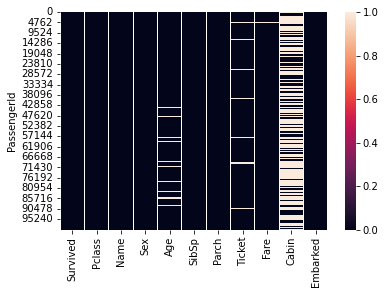

In [264]:
# Наглядный график отсутсвия данных по порядку всех колонок
sns.heatmap(train_data.isnull())

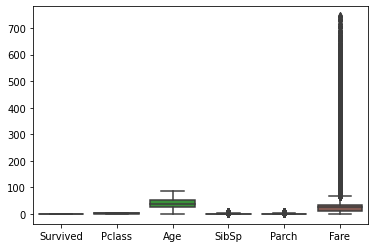

In [265]:
# Смотрим наличие выбросов по графику
sns.boxplot(data=train_data)

In [266]:
# Смотрим наличие выбросов ['Fare'] с помощь метода describe()
train_data['Fare'].describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

Чистка данных

In [267]:
# Убираем выбросы в колонке Fare(заменяем на nan)
for x in ['Fare']:
  Q1 =  train_data['Fare'].quantile(0.25)
  Q3 = train_data['Fare'].quantile(0.75)
  IQR = Q3 - Q1
  maks = (Q3+1.5*IQR)
  mins = (Q1-1.5*IQR)
  train_data.loc[train_data[x] < mins,x] = np.nan
  train_data.loc[train_data[x] > maks,x] = np.nan

In [268]:
# Исключаем дубликаты по имени и билету

key = ['Ticket','Name']
train_data = train_data.drop_duplicates(subset=key)
print(train_data.shape)

(99973, 11)


In [269]:
# Удаляем неинформативные колонки
train_data = train_data.drop('Name', axis=1)
train_data = train_data.drop('Ticket', axis=1)
train_data = train_data.drop('Cabin', axis=1)
print(train_data.shape)

(99973, 8)


In [270]:
# Заполняем пропуски в полезных колонках mode и median
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].mean())

In [271]:
# Проверяем, что в данных отсутствуют Nan
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99973 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  99973 non-null  int64  
 1   Pclass    99973 non-null  int64  
 2   Sex       99973 non-null  object 
 3   Age       99973 non-null  float64
 4   SibSp     99973 non-null  int64  
 5   Parch     99973 non-null  int64  
 6   Fare      99973 non-null  float64
 7   Embarked  99973 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [272]:
# Средние значения колонок по категории выжившие
train_data.groupby("Survived").mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.316652,36.786820,0.403314,0.435493,17.959718
1,1.825920,40.506951,0.390089,0.480333,21.132429


**Визуализация данных**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


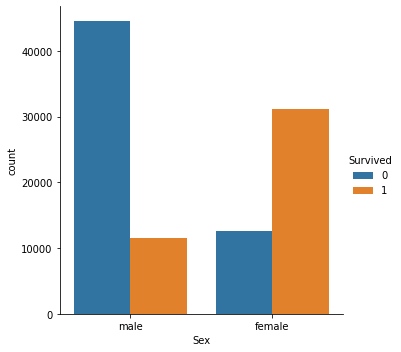

In [273]:
# График выживших в зависимости от пола
sns.catplot("Sex", data = train_data, hue = "Survived", kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


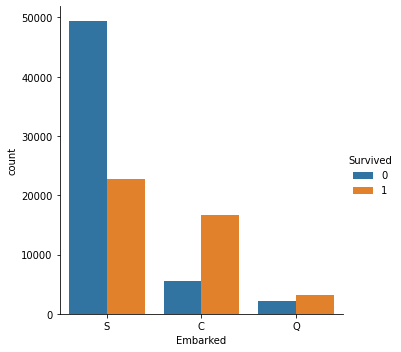

In [238]:
# График выживших в зависимости от порта отправления
sns.catplot("Embarked", data = train_data, hue = "Survived", kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


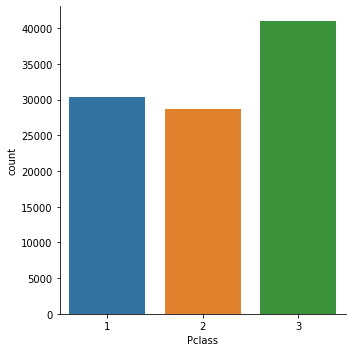

In [239]:
# График распределения по классу
sns.catplot("Pclass", data = train_data, kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


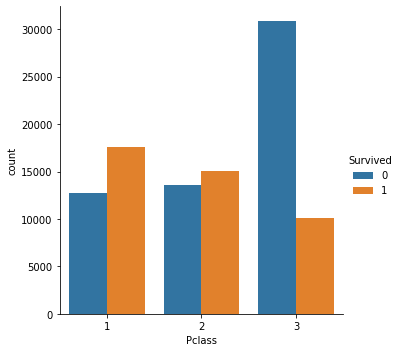

In [240]:
# График выживших в зависимости от класса
sns.catplot("Pclass", data = train_data, hue = "Survived", kind="count")

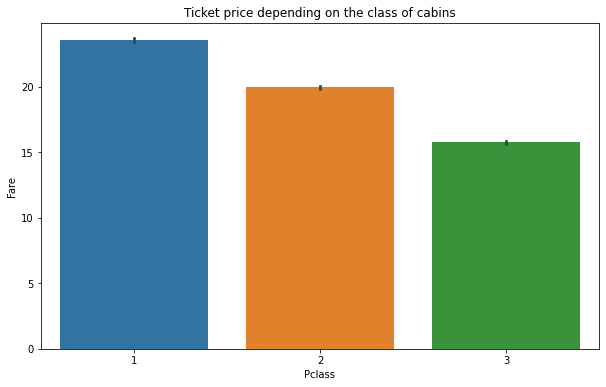

In [279]:
# Распределение цены на билет по классу билета
plt.figure(figsize=(10,6))
plt.title("Ticket price depending on the class of cabins")
sns.barplot(x=train_data['Pclass'], y=train_data['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


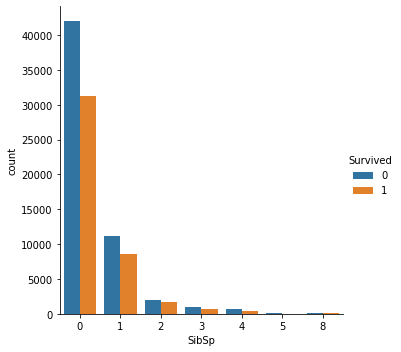

In [241]:
# График выживших в зависимости от наличия братьев и сестер / супруги на борту
sns.catplot("SibSp", data = train_data, hue = "Survived", kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


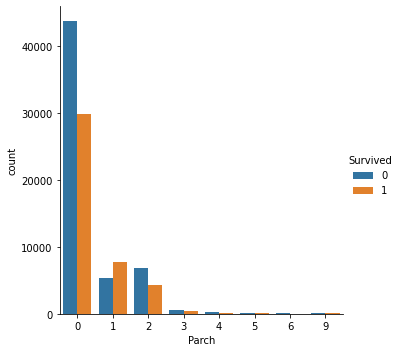

In [242]:
# График выживших в зависимости от наличия родителей / детей на борту
sns.catplot("Parch", data = train_data, hue = "Survived", kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


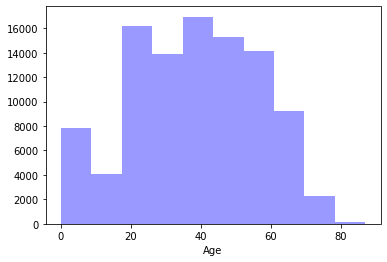

In [284]:
# Распределение пассажиров по возрасту
sns.distplot(a=train_data['Age'], kde=False, bins = 10, color = 'blue')

In [274]:
#делим людей на возрастные группы, где 1 - возраст до 10 лет и т.д.
train_data['Age_copy'] = train_data['Age']
train_data['Age_copy'] = train_data['Age_copy'].map(lambda age: int(age // 10) + 1)

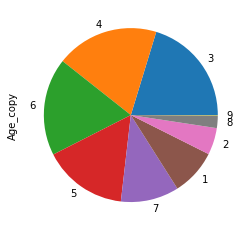

In [275]:
#Распределение пассажиров по возрастным группам
train_data['Age_copy'].value_counts().plot.pie()

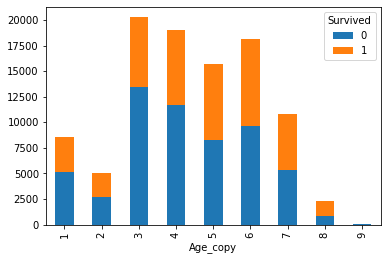

In [276]:
# Соотношение выживших и невыживших по возрастной группе
age_survived = train_data.groupby(['Age_copy', 'Survived'])
age_survived = age_survived.size().unstack()
age_survived.plot(kind='bar', stacked=True)

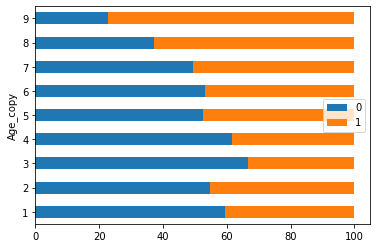

In [277]:
#Функция, переводящая количество в проценты, процентный график
def to_percent(r):
  return [(float(i)/sum(r))*100 for i in r]

age_survived.apply(to_percent, axis=1, result_type='expand').plot(kind='barh', stacked=True)

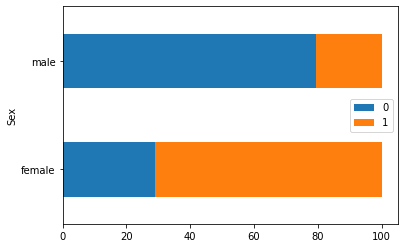

In [278]:
#Процентный график выживших по полу
train_data.groupby(['Sex', 'Survived']).size().unstack().apply(to_percent, axis=1, result_type='expand').plot(kind='barh', stacked=True)

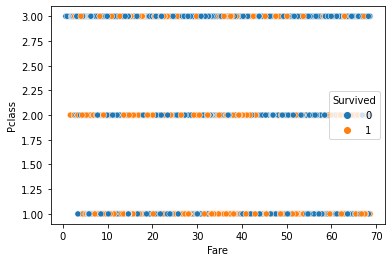

In [280]:
# Распределение выживших в зависи от класса и цены
sns.scatterplot(x=train_data['Fare'], y=train_data['Pclass'], hue=train_data['Survived'])

Выводы

Таким образом согласно анализу и визуализации данных на борту было мужчин больше, чем женщин. Большинство людей не выжило. Большинство женщин выжили, мужчин - наоборот.
Большинство людей отправлялись из порта "Southampton"; больший процент выживаемости для порта "Cherbourg", меньший - для "Southampton".
Самый популярный класс билета - третий, т.к. самый дешевый. Выживаемость у него минимальная. Чаще выживали люди с первым классом билета (самым дорогим) и средней ценой на него - вероятно из-за расположения кают на более высоком уровне.
Наибольшее количество пассажиров были без братьев, сестер или супруги. Наибольшая выживаемость при наличии двух людй из данной категории (но меньше половины). Возмодно это так из-за взаимопощи родных друг-другу.
Наибольшее количество пассажиров были без детей или родителей. Наибольшая выживаемость при наличии одного человека из данной категории (больше половины).
Средний возраст пассажиров - 38 лет. Самая малочисленная возврастная группа - 9 (от 80 до 90 лет) имеет самый высоким процент выживших, возможно из-за того, что им было место в спасательных шлюпках (места были ограничены)
Наименьшая выживаемость у 3-й возрастной категории. Процент выживших мужчин окло 20, женщин более 70.

Вывод: Больший шанс выжить у женщины старше 80 лет, севшей в порту "Cherbourg" с первым классом билета, у которой есть: брат и сестра или супруг, а так же ребенок или родитель.